<a href="https://colab.research.google.com/github/naufalfadilla/S-P-500-Companies-Price-Dynamics/blob/main/Mini_Project_Muhammad_Naufal_Fadillah_3333210060_Kelas_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

This is a snapshot of a dataset created by Tony Pin on Melbourne real estate data. It was scraped from publicly available results posted every week from Domain.com.au. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

This is intended as a static (unchanging) snapshot of https://www.kaggle.com/anthonypino/melbourne-housing-market. It was created in September 2017. Additionally, homes with no Price have been removed.

Dataset description & download https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

**1.1 Importing Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

In [ ]:
!gdown --id 11QvxFT-AATi2Awln7MG2AfOl16nxWg1N

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11QvxFT-AATi2Awln7MG2AfOl16nxWg1N
To: /content/clean_sp500_index_2018_2023.csv
100% 9.71k/9.71k [00:00<00:00, 38.5MB/s]


In [ ]:
import pandas as pd
dataset = pd.read_csv('clean_sp500_index_2018_2023.csv')
dataset

,Company,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,mo_return,GICS Sector,GICS Sub-Industry
0,^GSPC,2683.729980,2872.870117,2682.360107,2823.810059,77318690000,0.0,0.0,2018,1,1,NaN,S&P500 Index,S&P500 Index
1,^GSPC,2816.449951,2835.959961,2532.689941,2713.830078,79933970000,0.0,0.0,2018,2,1,-0.038947,S&P500 Index,S&P500 Index
2,^GSPC,2715.219971,2801.899902,2585.889893,2640.870117,76803890000,0.0,0.0,2018,3,1,-0.026884,S&P500 Index,S&P500 Index
3,^GSPC,2633.449951,2717.489990,2553.800049,2648.050049,70194700000,0.0,0.0,2018,4,1,0.002719,S&P500 Index,S&P500 Index
4,^GSPC,2642.959961,2742.239990,2594.620117,2705.270020,76011820000,0.0,0.0,2018,5,1,0.021608,S&P500 Index,S&P500 Index
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,^GSPC,3853.290039,4094.209961,3794.330078,4076.600098,80763810000,0.0,0.0,2023,1,1,0.061753,S&P500 Index,S&P500 Index
61,^GSPC,4070.070068,4195.439941,3943.080078,3970.149902,80392280000,0.0,0.0,2023,2,1,-0.026112,S&P500 Index,S&P500 Index
62,^GSPC,3963.340088,4110.750000,3808.860107,4109.310059,113094800000,0.0,0.0,2023,3,1,0.035052,S&P500 Index,S&P500 Index
63,^GSPC,4102.200195,4170.060059,4049.350098,4169.479980,70861260000,0.0,0.0,2023,4,1,0.014642,S&P500 Index,S&P500 Index


## 2. Exploratory Data

In [ ]:
dataset.shape

(65, 14)

In [ ]:
dataset.columns

Index(['Company', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Year', 'Month', 'Day', 'mo_return', 'GICS Sector',
       'GICS Sub-Industry'],
      dtype='object')

In [ ]:
dataset.dtypes

Company               object
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                 int64
Dividends            float64
Stock Splits         float64
Year                   int64
Month                  int64
Day                    int64
mo_return            float64
GICS Sector           object
GICS Sub-Industry     object
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            65 non-null     object 
 1   Open               65 non-null     float64
 2   High               65 non-null     float64
 3   Low                65 non-null     float64
 4   Close              65 non-null     float64
 5   Volume             65 non-null     int64  
 6   Dividends          65 non-null     float64
 7   Stock Splits       65 non-null     float64
 8   Year               65 non-null     int64  
 9   Month              65 non-null     int64  
 10  Day                65 non-null     int64  
 11  mo_return          64 non-null     float64
 12  GICS Sector        65 non-null     object 
 13  GICS Sub-Industry  65 non-null     object 
dtypes: float64(7), int64(4), object(3)
memory usage: 7.2+ KB


In [ ]:
dataset.nunique()

Company               1
Open                 65
High                 65
Low                  65
Close                65
Volume               65
Dividends             1
Stock Splits          1
Year                  6
Month                12
Day                   1
mo_return            64
GICS Sector           1
GICS Sub-Industry     1
dtype: int64

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

In [ ]:
dataset.isnull().sum()

Company              0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
Dividends            0
Stock Splits         0
Year                 0
Month                0
Day                  0
mo_return            1
GICS Sector          0
GICS Sub-Industry    0
dtype: int64

In [ ]:
dataset['mo_return'].dtypes

dtype('float64')

In [ ]:
dataset['BuildingArea'].dtypes

KeyError: ignored

In [ ]:
dataset['YearBuilt'].dtypes

dtype('float64')

In [ ]:
dataset['CouncilArea'].dtypes

dtype('O')

Perform imputer to handle missing value in numerical data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [ ]:
imputer = imputer.fit(dataset[['mo_return']])
imputer

SimpleImputer()

In [ ]:
dataset[['Car', 'BuildingArea', 'YearBuilt']] = imputer.transform(dataset[['Car', 'BuildingArea', 'YearBuilt']])
dataset.isnull().sum()

KeyError: ignored

Using drop column tohandle missing value on categorical or object data

In [ ]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

Company              0
Open                 0
High                 0
Low                  0
Close                0
Volume               0
Dividends            0
Stock Splits         0
Year                 0
Month                0
Day                  0
GICS Sector          0
GICS Sub-Industry    0
dtype: int64

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

In [ ]:
dataset = dataset.drop('Date', axis=1)
dataset

KeyError: ignored

## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

In [ ]:
dataset.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day
count,65.000000,65.000000,65.000000,65.000000,6.500000e+01,65.0,65.0,65.000000,65.000000,65.0
mean,3481.533838,3616.307377,3339.646781,3499.361392,8.762100e+10,0.0,0.0,2020.230769,6.230769,1.0
std,673.732434,680.535866,649.587499,666.505165,1.927255e+10,0.0,0.0,1.588722,3.494501,0.0
min,2476.959961,2708.949951,2191.860107,2506.850098,2.363054e+10,0.0,0.0,2018.000000,1.000000,1.0
25%,2869.090088,2954.129883,2750.520020,2912.429932,7.728798e+10,0.0,0.0,2019.000000,3.000000,1.0
50%,3296.199951,3549.850098,3233.939941,3363.000000,8.416218e+10,0.0,0.0,2020.000000,6.000000,1.0
75%,4102.200195,4186.919922,3943.080078,4130.290039,9.556289e+10,0.0,0.0,2022.000000,9.000000,1.0
max,4778.140137,4818.620117,4560.000000,4766.180176,1.621854e+11,0.0,0.0,2023.000000,12.000000,1.0


<Axes: >

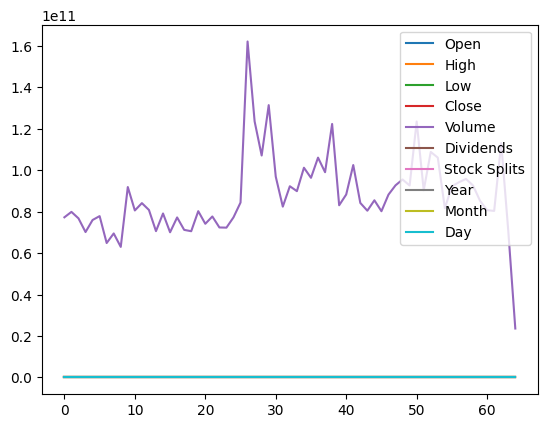

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

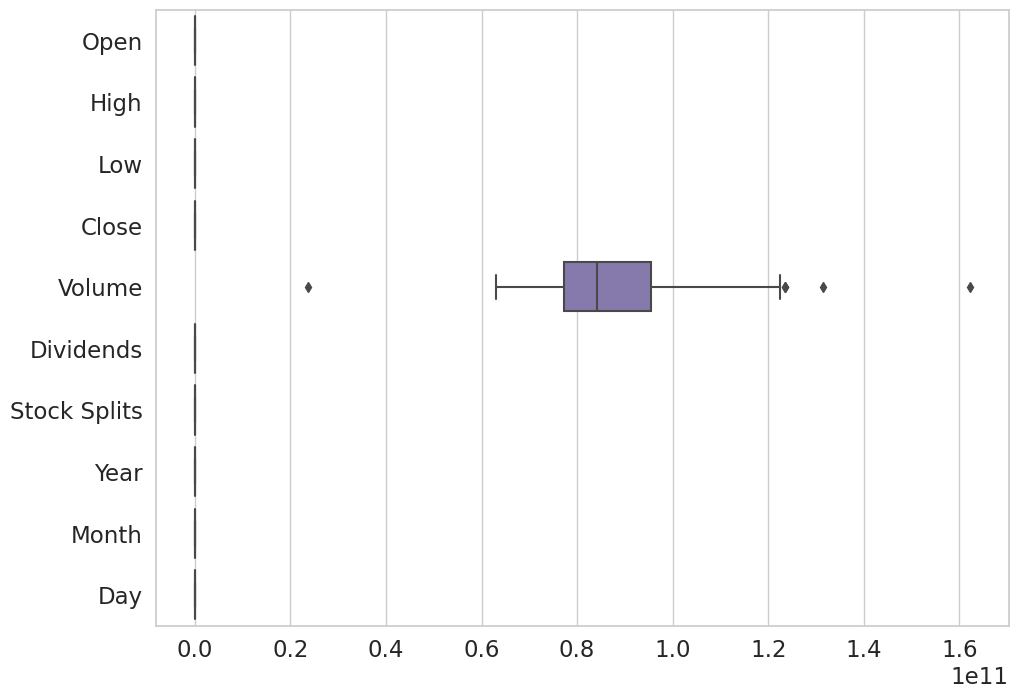

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

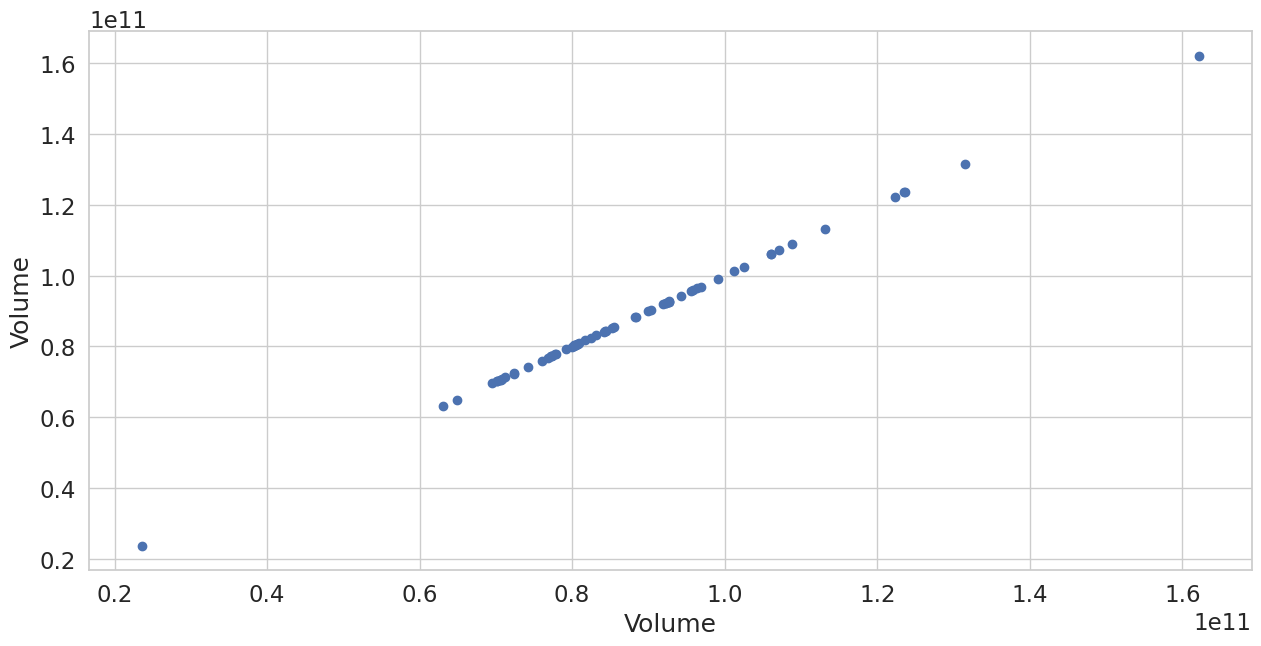

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Volume'], dataset['Volume'])
 
# x-axis label
ax.set_xlabel('Volume')
 
# y-axis label
ax.set_ylabel('Volume')
plt.show()

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [ ]:
import sklearn

# IQR Volume
Q1 = np.percentile(dataset['Volume'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Volume'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (65, 13)


In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Volume'] > upper].index
outliers_lower = dataset[dataset['Volume'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (60, 13)


<ipython-input-51-dfa5108ea68f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers, inplace=True)


In [ ]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['Volume'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Volume'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (60, 13)


In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Volume'] > upper].index
outliers_lower = dataset[dataset['Volume'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (59, 13)


<ipython-input-53-dfa5108ea68f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers, inplace=True)


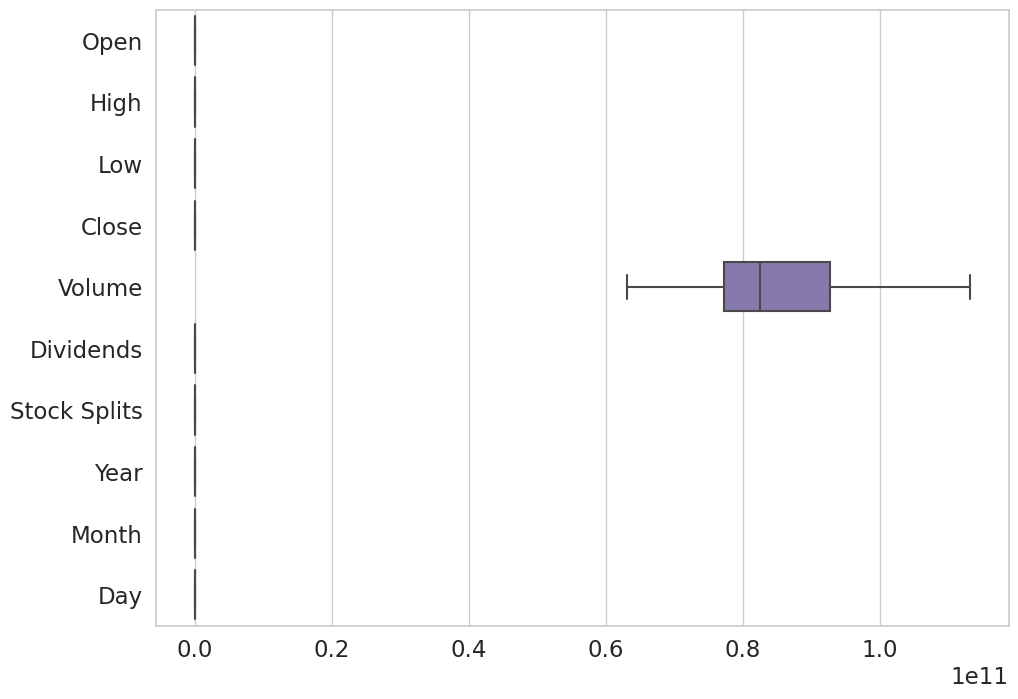

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

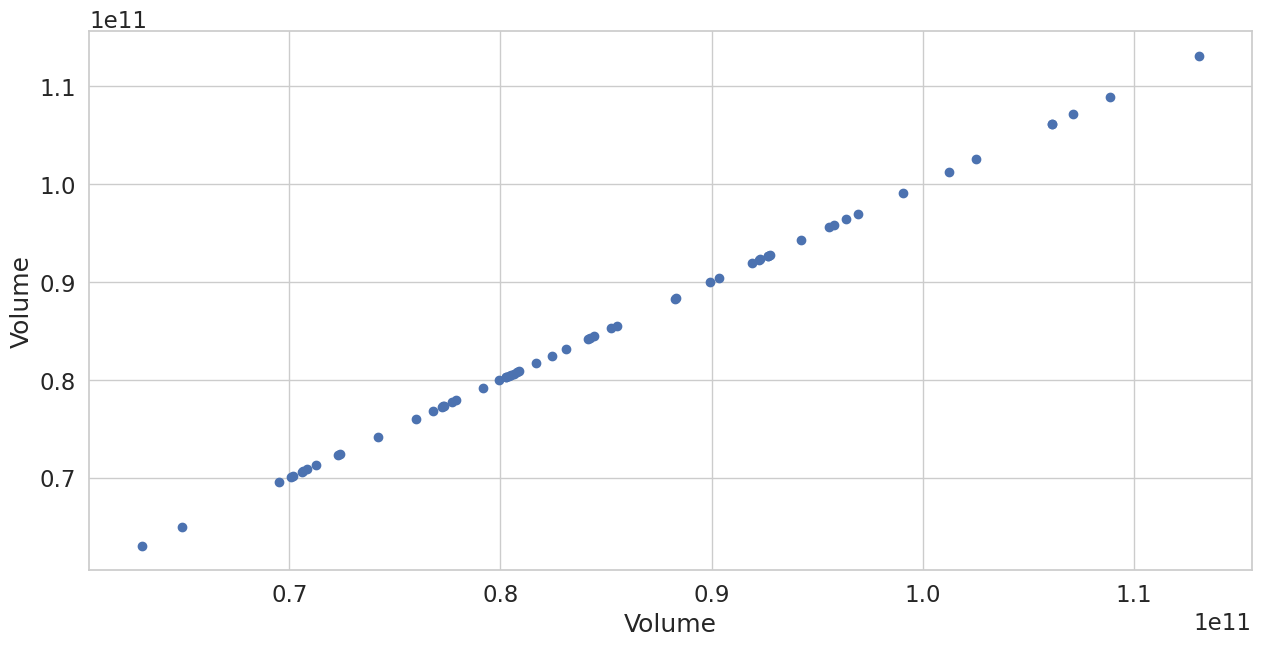

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Volume'], dataset['Volume'])
 
# x-axis label
ax.set_xlabel('Volume')
 
# y-axis label
ax.set_ylabel('Volume')
plt.show()

Show data distribution based on density (kde - kernel density estimation)

LinAlgError: ignored

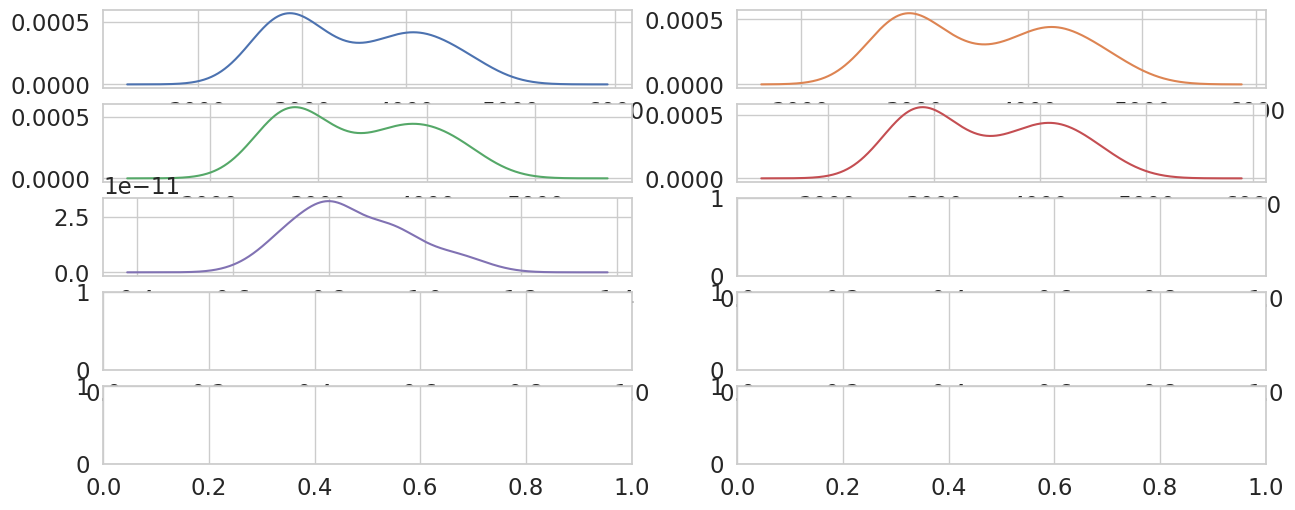

In [ ]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Show data distribution based on histogram

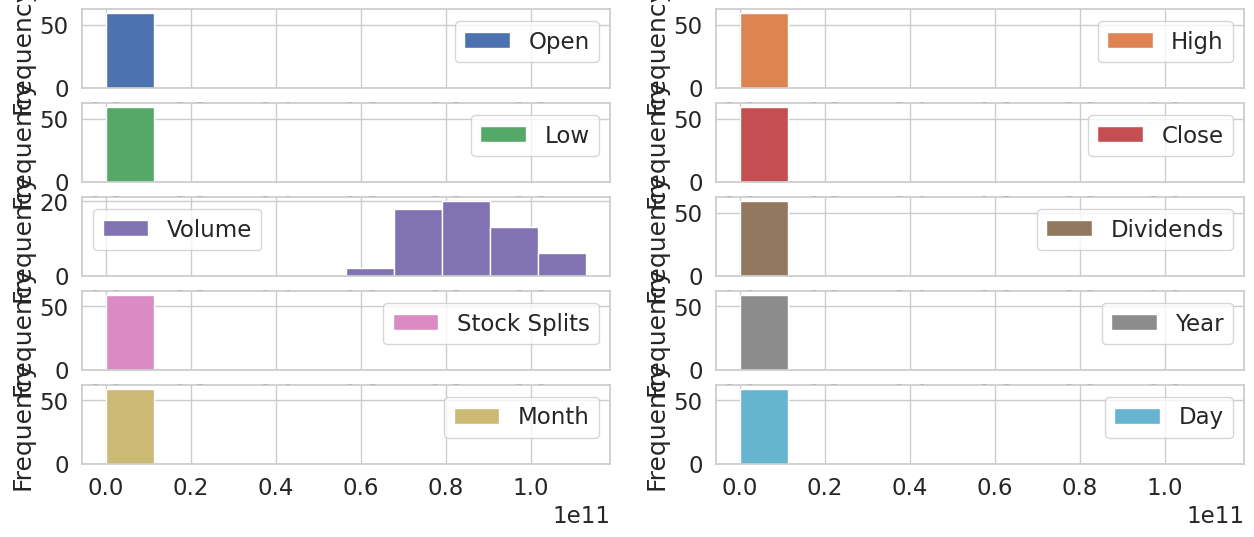

In [ ]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

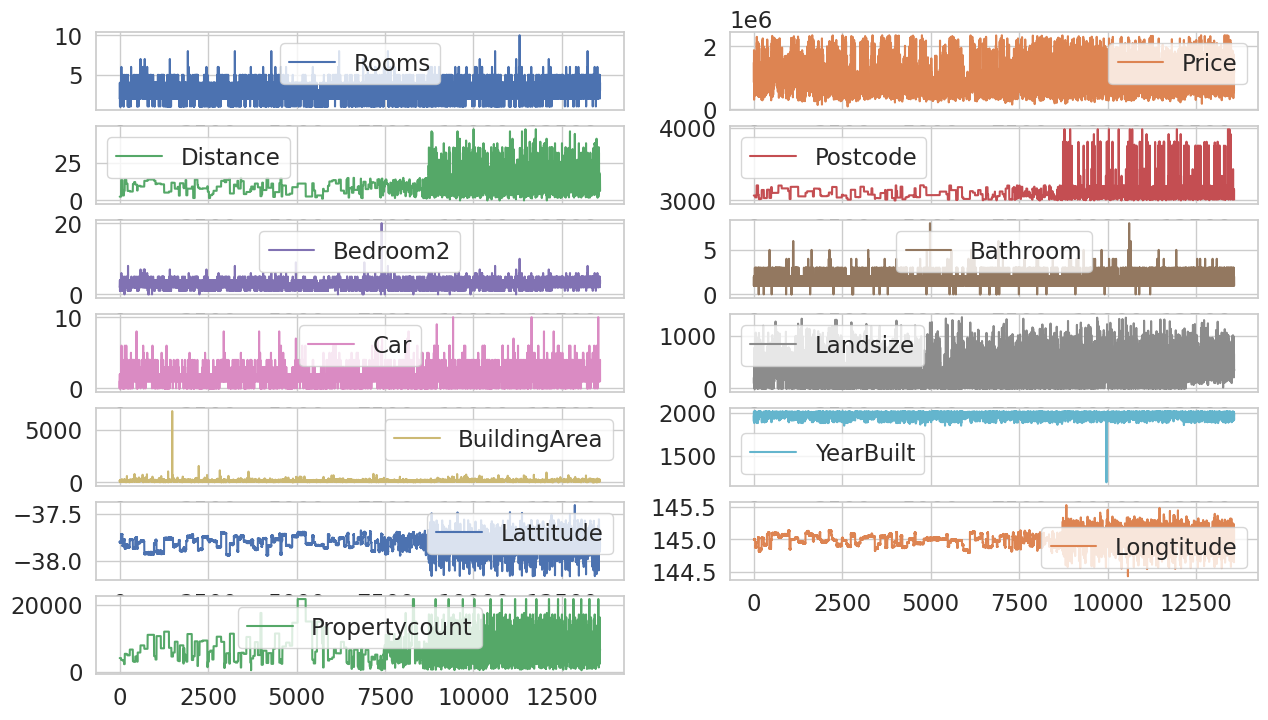

In [ ]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

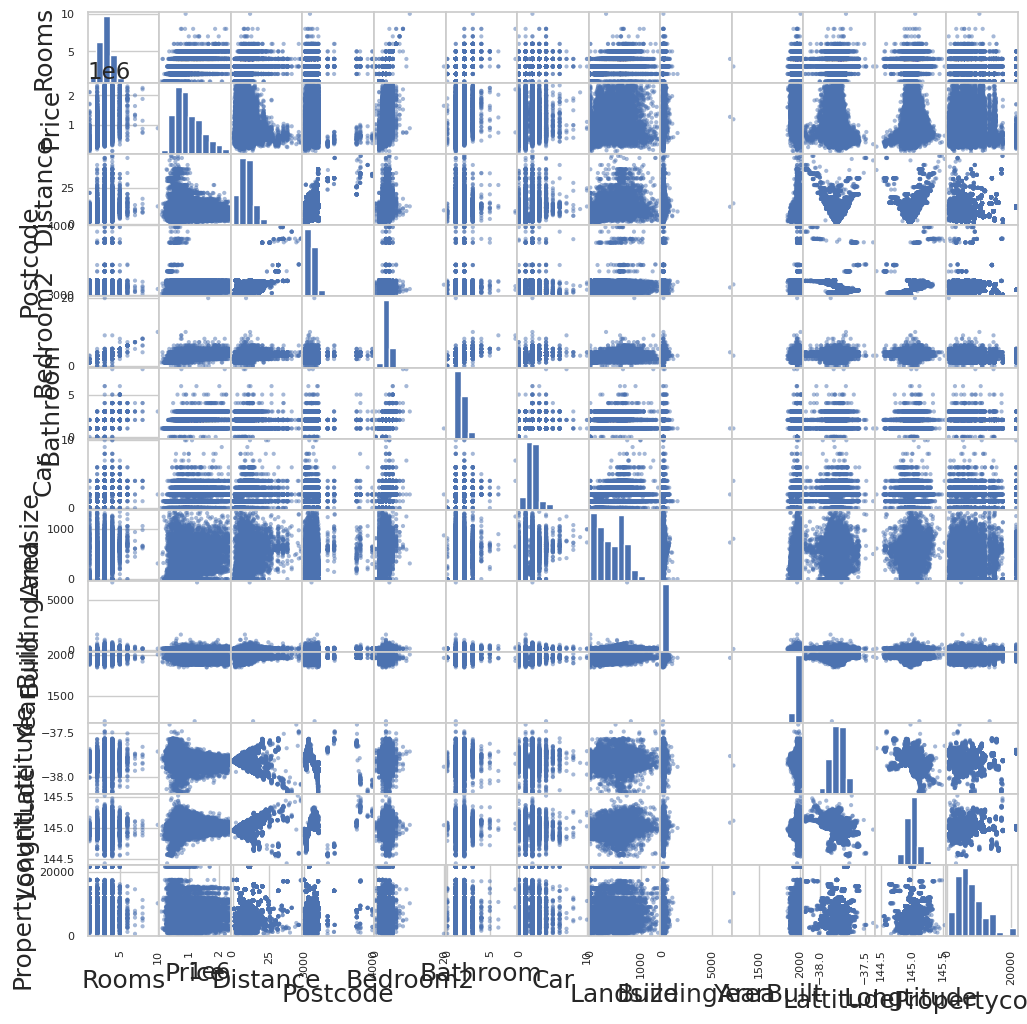

In [ ]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

correlation matrix with heatmap

<ipython-input-30-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


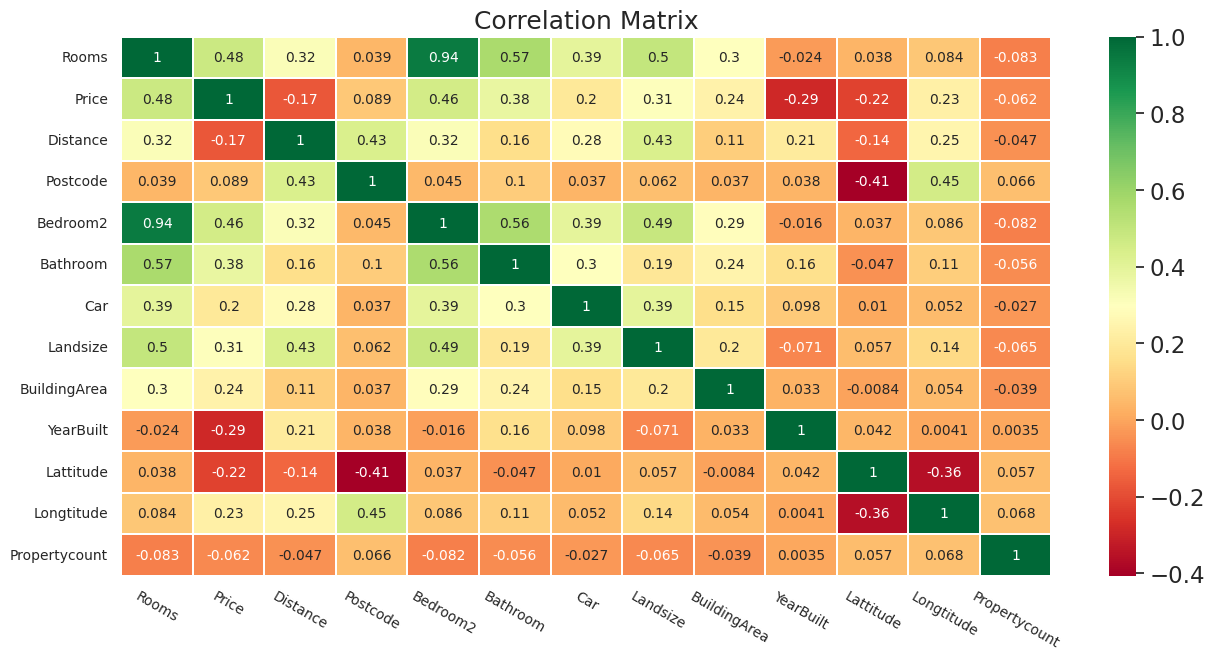

In [ ]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

In [ ]:
x = dataset.drop('Volume', axis=1)
x

,Company,Open,High,Low,Close,Dividends,Stock Splits,Year,Month,Day,GICS Sector,GICS Sub-Industry
0,^GSPC,2683.729980,2872.870117,2682.360107,2823.810059,0.0,0.0,2018,1,1,S&P500 Index,S&P500 Index
1,^GSPC,2816.449951,2835.959961,2532.689941,2713.830078,0.0,0.0,2018,2,1,S&P500 Index,S&P500 Index
2,^GSPC,2715.219971,2801.899902,2585.889893,2640.870117,0.0,0.0,2018,3,1,S&P500 Index,S&P500 Index
3,^GSPC,2633.449951,2717.489990,2553.800049,2648.050049,0.0,0.0,2018,4,1,S&P500 Index,S&P500 Index
4,^GSPC,2642.959961,2742.239990,2594.620117,2705.270020,0.0,0.0,2018,5,1,S&P500 Index,S&P500 Index
5,^GSPC,2718.699951,2791.469971,2691.989990,2718.370117,0.0,0.0,2018,6,1,S&P500 Index,S&P500 Index
6,^GSPC,2704.949951,2848.030029,2698.949951,2816.290039,0.0,0.0,2018,7,1,S&P500 Index,S&P500 Index
7,^GSPC,2821.169922,2916.500000,2796.340088,2901.520020,0.0,0.0,2018,8,1,S&P500 Index,S&P500 Index
8,^GSPC,2896.959961,2940.909912,2864.120117,2913.979980,0.0,0.0,2018,9,1,S&P500 Index,S&P500 Index
9,^GSPC,2926.290039,2939.860107,2603.540039,2711.739990,0.0,0.0,2018,10,1,S&P500 Index,S&P500 Index


Choose feature Type as a label

In [ ]:
y = dataset["Volume"]
y

0      77318690000
1      79933970000
2      76803890000
3      70194700000
4      76011820000
5      77891360000
6      64898300000
7      69523070000
8      63031510000
9      91930980000
10     80620020000
11     84162180000
12     80859870000
13     70638770000
14     79159660000
15     70090370000
16     77250740000
17     71250630000
18     70599470000
19     80269220000
20     74178980000
21     77720640000
22     72410620000
23     72325540000
24     77287980000
25     84436590000
28    107135190000
30     96928130000
31     82466520000
32     92310780000
33     89938980000
34    101247180000
35     96375680000
36    106117800000
37     99082320000
39     83124090000
40     88321860000
41    102544180000
42     84255620000
43     80500760000
44     85528860000
45     80253600000
46     88268840000
47     92750180000
48     95562890000
49     92667710000
51     90367840000
52    108860390000
53    106116710000
54     81688320000
55     92252350000
56     94241020000
57     95823

In [ ]:
y.values.reshape(-1,1)

array([[ 77318690000],
       [ 79933970000],
       [ 76803890000],
       [ 70194700000],
       [ 76011820000],
       [ 77891360000],
       [ 64898300000],
       [ 69523070000],
       [ 63031510000],
       [ 91930980000],
       [ 80620020000],
       [ 84162180000],
       [ 80859870000],
       [ 70638770000],
       [ 79159660000],
       [ 70090370000],
       [ 77250740000],
       [ 71250630000],
       [ 70599470000],
       [ 80269220000],
       [ 74178980000],
       [ 77720640000],
       [ 72410620000],
       [ 72325540000],
       [ 77287980000],
       [ 84436590000],
       [107135190000],
       [ 96928130000],
       [ 82466520000],
       [ 92310780000],
       [ 89938980000],
       [101247180000],
       [ 96375680000],
       [106117800000],
       [ 99082320000],
       [ 83124090000],
       [ 88321860000],
       [102544180000],
       [ 84255620000],
       [ 80500760000],
       [ 85528860000],
       [ 80253600000],
       [ 88268840000],
       [ 92

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [ ]:
x = pd.get_dummies(x)
x

,Open,High,Low,Close,Dividends,Stock Splits,Year,Month,Day,Company_^GSPC,GICS Sector_S&P500 Index,GICS Sub-Industry_S&P500 Index
0,2683.729980,2872.870117,2682.360107,2823.810059,0.0,0.0,2018,1,1,1,1,1
1,2816.449951,2835.959961,2532.689941,2713.830078,0.0,0.0,2018,2,1,1,1,1
2,2715.219971,2801.899902,2585.889893,2640.870117,0.0,0.0,2018,3,1,1,1,1
3,2633.449951,2717.489990,2553.800049,2648.050049,0.0,0.0,2018,4,1,1,1,1
4,2642.959961,2742.239990,2594.620117,2705.270020,0.0,0.0,2018,5,1,1,1,1
5,2718.699951,2791.469971,2691.989990,2718.370117,0.0,0.0,2018,6,1,1,1,1
6,2704.949951,2848.030029,2698.949951,2816.290039,0.0,0.0,2018,7,1,1,1,1
7,2821.169922,2916.500000,2796.340088,2901.520020,0.0,0.0,2018,8,1,1,1,1
8,2896.959961,2940.909912,2864.120117,2913.979980,0.0,0.0,2018,9,1,1,1,1
9,2926.290039,2939.860107,2603.540039,2711.739990,0.0,0.0,2018,10,1,1,1,1


In [ ]:
x.shape

(12627, 13041)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,13031,13032,13033,13034,13035,13036,13037,13038,13039,13040
0,-0.977169,1.080337,-1.336187,-0.399787,-0.940403,-0.762263,-0.620854,-0.708989,0.082472,-0.010782,...,-0.029528,-0.030842,-0.35412,-0.061124,1.540616,-0.052721,-0.189338,-0.686664,-0.543699,-0.049609
1,-0.977169,0.101574,-1.336187,-0.399787,-0.940403,-0.762263,-1.678511,-0.871072,-0.797202,-2.290195,...,-0.029528,-0.030842,-0.35412,-0.061124,1.540616,-0.052721,-0.189338,-0.686664,-0.543699,-0.049609
2,0.106410,1.047345,-1.336187,-0.399787,0.128502,0.799492,-1.678511,-0.948590,0.058751,-2.290195,...,-0.029528,-0.030842,-0.35412,-0.061124,1.540616,-0.052721,-0.189338,-0.686664,-0.543699,-0.049609
3,0.106410,-0.305328,-1.336187,-0.399787,0.128502,0.799492,-0.620854,-1.089531,0.082472,-0.010782,...,-0.029528,-0.030842,-0.35412,-0.061124,1.540616,-0.052721,-0.189338,-0.686664,-0.543699,-0.049609
4,1.189989,1.344274,-1.336187,-0.399787,0.128502,-0.762263,0.436803,-0.997919,-0.037695,1.727062,...,-0.029528,-0.030842,-0.35412,-0.061124,1.540616,-0.052721,-0.189338,-0.686664,-0.543699,-0.049609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12622,0.106410,-0.894786,1.068365,-0.597321,0.128502,0.799492,0.436803,-0.518718,0.082472,-0.010782,...,-0.029528,-0.030842,-0.35412,-0.061124,1.540616,-0.052721,-0.189338,-0.686664,-0.543699,-0.049609
12623,1.189989,0.563462,1.102715,0.511062,1.197408,0.799492,0.436803,0.876604,0.082472,0.564172,...,-0.029528,-0.030842,-0.35412,-0.061124,-0.649091,-0.052721,5.281547,-0.686664,-0.543699,-0.049609
12624,0.106410,0.092776,-0.597646,-0.959466,0.128502,0.799492,0.436803,-0.247405,-0.146196,1.057519,...,-0.029528,-0.030842,-0.35412,-0.061124,-0.649091,-0.052721,-0.189338,-0.686664,1.839253,-0.049609
12625,0.106410,0.398502,-0.597646,-0.959466,0.128502,0.799492,2.552116,0.115519,0.082472,1.127998,...,-0.029528,-0.030842,-0.35412,-0.061124,-0.649091,-0.052721,-0.189338,-0.686664,1.839253,-0.049609


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.089854,0.077699,0.151702,0.140289,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.147529,0.060204,0.084082,0.091611,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0
2,0.103538,0.044059,0.108118,0.059318,0.0,0.0,0.0,0.181818,0.0,0.0,0.0,0.0
3,0.068004,0.004048,0.093620,0.062496,0.0,0.0,0.0,0.272727,0.0,0.0,0.0,0.0
4,0.072137,0.015780,0.112062,0.087822,0.0,0.0,0.0,0.363636,0.0,0.0,0.0,0.0
5,0.105050,0.039115,0.156053,0.093621,0.0,0.0,0.0,0.454545,0.0,0.0,0.0,0.0
6,0.099075,0.065925,0.159197,0.136961,0.0,0.0,0.0,0.545455,0.0,0.0,0.0,0.0
7,0.149580,0.098380,0.203197,0.174684,0.0,0.0,0.0,0.636364,0.0,0.0,0.0,0.0
8,0.182515,0.109951,0.233819,0.180199,0.0,0.0,0.0,0.727273,0.0,0.0,0.0,0.0
9,0.195261,0.109453,0.116092,0.090686,0.0,0.0,0.0,0.818182,0.0,0.0,0.0,0.0


**4.3 Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

ValueError: ignored

In [ ]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

NameError: ignored

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [ ]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [ ]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NameError: ignored

In [ ]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.8705463182897862


[[1696   11   49]
 [ 117   47   53]
 [  83   14  456]]


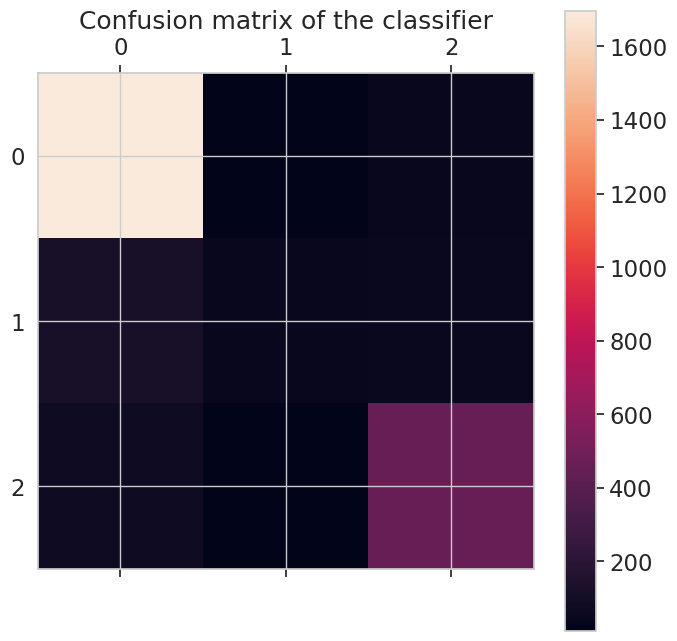

In [ ]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           h       0.89      0.97      0.93      1756
           t       0.65      0.22      0.33       217
           u       0.82      0.82      0.82       553

    accuracy                           0.87      2526
   macro avg       0.79      0.67      0.69      2526
weighted avg       0.86      0.87      0.85      2526

